# ***Water Potability Dataset***

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level.

##Dataset Features



*  pH value
*  Hardness
*  Solids (Total dissolved solids - TDS)
*  Chloramines
*  Sulfate
*  Conductivity
*  Organic_carbon
*  Trihalomethanes
*  Turbidity
*  Potability : Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/water_potability.csv'

In [5]:
water_df = pd.read_csv(path)


In [6]:
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


##EDA

In this segment we are looking the dataset's distributions and values.

In [7]:
water_df.shape

(3276, 10)

In [8]:
water_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
water_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
#checking the null values
water_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
#Mean and median values of the features that has null values
ph_mean = water_df['ph'].mean()
ph_median = water_df['ph'].median()

sulfate_mean = water_df['Sulfate'].mean()
sulfate_median = water_df['Sulfate'].median()

trihalomethanes_mean = water_df['Trihalomethanes'].mean()
trihalomethanes_median = water_df['Trihalomethanes'].median()

print("Mean Values", " - ", "Median Values")
print(ph_mean ,ph_median)
print(sulfate_mean,sulfate_median)
print(trihalomethanes_mean, trihalomethanes_median)

Mean Values  -  Median Values
7.080794504276835 7.036752103833548
333.7757766108135 333.073545745888
66.39629294676803 66.62248509808484


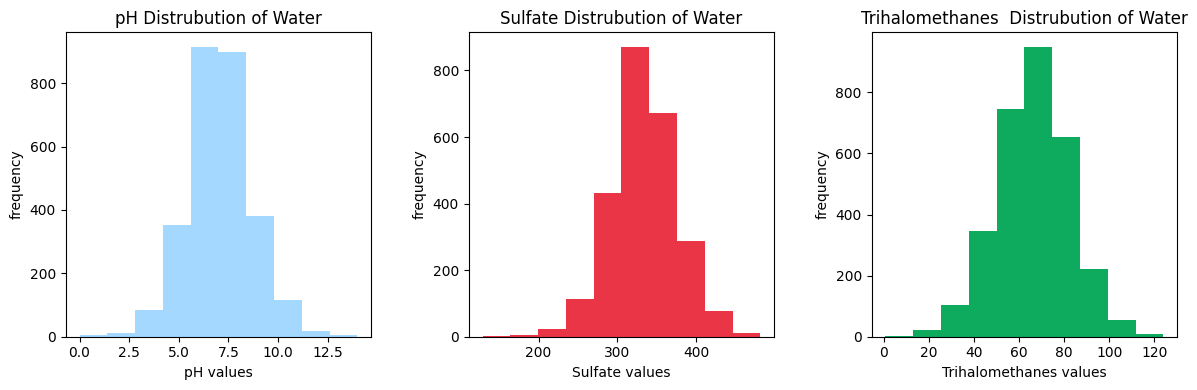

In [12]:
#Let's see the distrubition of ph, Sulfate and Trihalomethanes in the datasets. Looking at these distrubiton will help us to decide how to fill the null values in dataset

fig ,axs = plt.subplots( nrows=1, ncols=3, figsize=(12,4))
colors = ['#A5D8FF','#EA3546','#0EAB5F']

axs[0].hist(water_df['ph'], bins=10 , color='#A5D8FF')
axs[0].set_title('pH Distrubution of Water')
axs[0].set_xlabel('pH values')
axs[0].set_ylabel('frequency')

axs[1].hist(water_df['Sulfate'], bins=10,color='#EA3546')
axs[1].set_title('Sulfate Distrubution of Water')
axs[1].set_xlabel('Sulfate values')
axs[1].set_ylabel('frequency')

axs[2].hist(water_df['Trihalomethanes'], bins=10 , color='#0EAB5F')
axs[2].set_title('Trihalomethanes  Distrubution of Water')
axs[2].set_xlabel('Trihalomethanes values')
axs[2].set_ylabel('frequency')

plt.tight_layout(w_pad=3.0) #wpad parametresi plotlar arasındaki boşluğu ayarlamamıza yardımcı olur
plt.show()

*As we see here the pH values has normal distrubiton in our sample. And we calculate mean and median values also we get similar results to each other that means we can fill the null values with mean value of our sample*

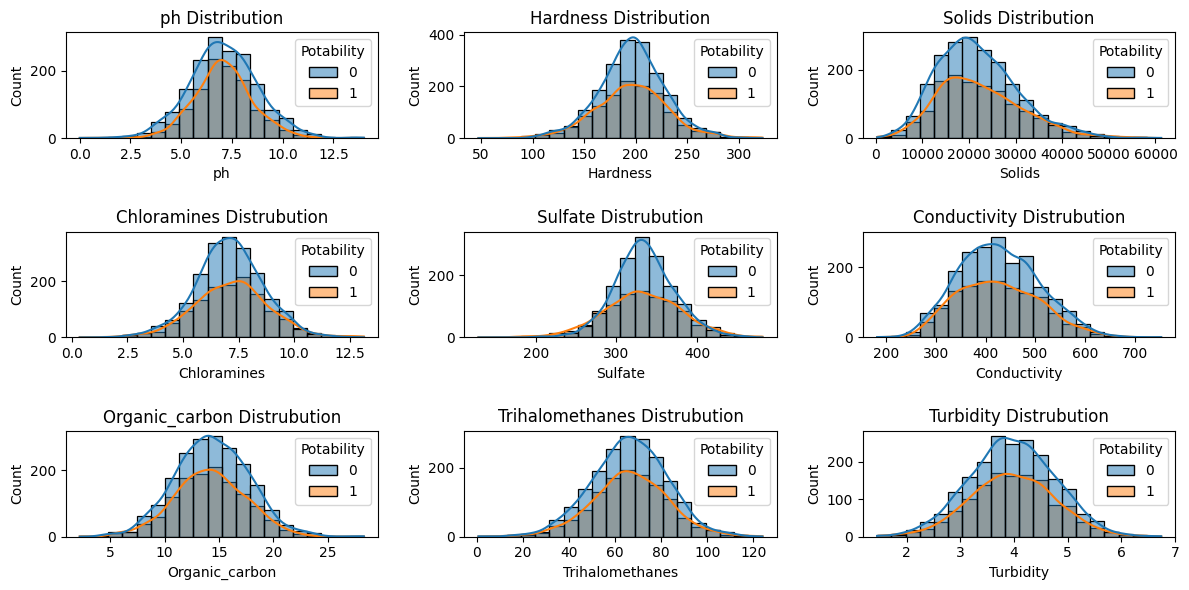

In [13]:
#ph	Hardness	Solids	Chloramines	Sulfate	Conductivity	Organic_carbon	Trihalomethanes	Turbidity	Potability

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 6))

sns.histplot(x=water_df['ph'], data=water_df, hue='Potability', kde=True, bins=20, ax=axes[0][0])
axes[0][0].set_title('ph Distribution')

sns.histplot(x=water_df['Hardness'], data=water_df, hue='Potability', kde=True, bins=20, ax=axes[0][1])
axes[0][1].set_title('Hardness Distribution')

sns.histplot(x=water_df['Solids'], data = water_df , hue='Potability', kde=True, bins=20 , ax=axes[0][2])
axes[0][2].set_title('Solids Distribution')

sns.histplot( x= water_df['Chloramines'] ,data = water_df, hue='Potability', kde=True, bins=20, ax=axes[1][0])
axes[1][0].set_title('Chloramines Distrubution')

sns.histplot( x= water_df['Sulfate'] ,data = water_df, hue='Potability', kde=True, bins=20, ax=axes[1][1])
axes[1][1].set_title('Sulfate Distrubution')

sns.histplot( x= water_df['Conductivity'] ,data = water_df, hue='Potability', kde=True, bins=20, ax=axes[1][2])
axes[1][2].set_title('Conductivity Distrubution')

sns.histplot( x= water_df['Organic_carbon'] ,data = water_df, hue='Potability', kde=True, bins=20, ax=axes[2][0])
axes[2][0].set_title('Organic_carbon Distrubution')

sns.histplot( x= water_df['Trihalomethanes'] ,data = water_df, hue='Potability' ,kde=True, bins=20, ax=axes[2][1])
axes[2][1].set_title('Trihalomethanes Distrubution')

sns.histplot( x= water_df['Turbidity'] ,data = water_df, hue='Potability', kde=True, bins=20, ax=axes[2][2])
axes[2][2].set_title('Turbidity Distrubution')



plt.tight_layout(w_pad=2.0, h_pad=2.0)
plt.show()


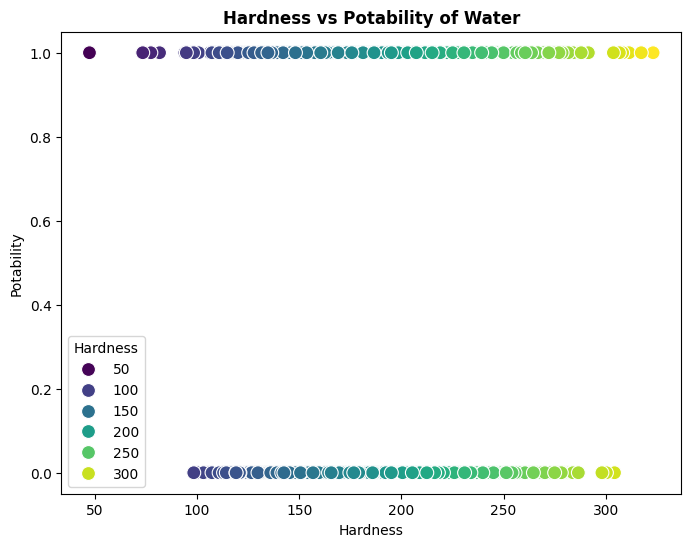

In [14]:
#Hardness and Potability Relations
plt.figure(figsize=(8,6))
sns.scatterplot(x = water_df["Hardness"], y = water_df["Potability"], hue=water_df['Hardness'], palette="viridis", s = 100)

plt.title("Hardness vs Potability of Water", weight = "bold")

plt.show()

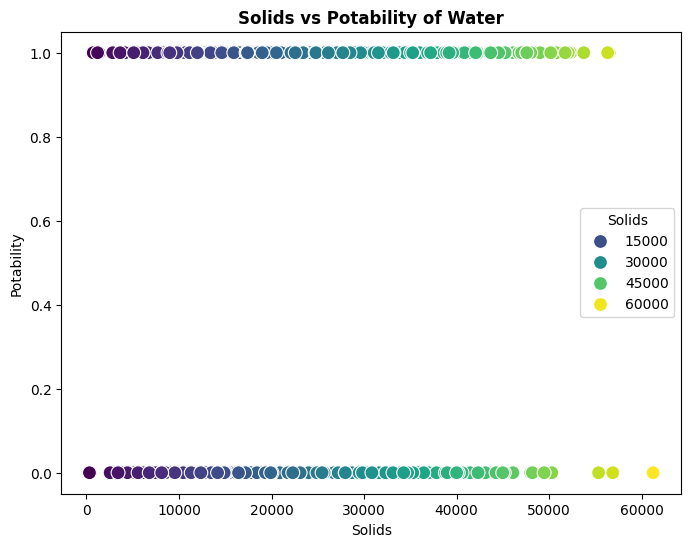

In [15]:
#Solids and Potability Relations
plt.figure(figsize=(8,6))
sns.scatterplot(x = water_df["Solids"], y = water_df["Potability"], hue=water_df['Solids'], palette="viridis", s = 100)

plt.title("Solids vs Potability of Water", weight = "bold")

plt.show()

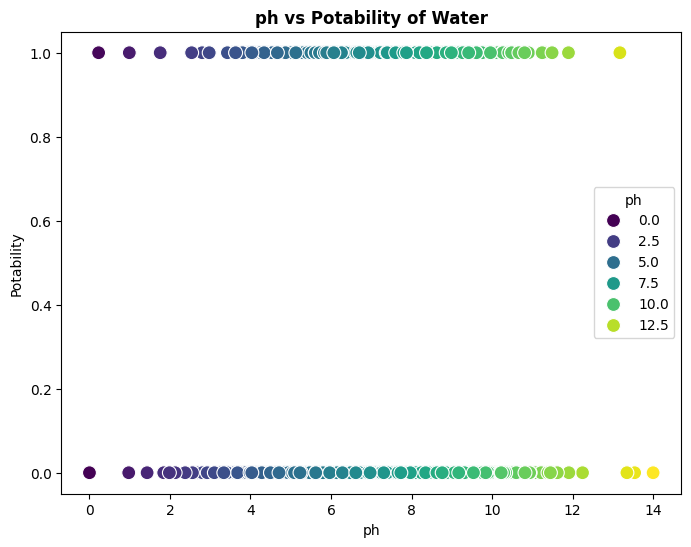

In [16]:
#ph and Potability Relations
plt.figure(figsize=(8,6))
sns.scatterplot(x = water_df["ph"], y = water_df["Potability"], hue=water_df['ph'], palette="viridis", s = 100)

plt.title("ph vs Potability of Water", weight = "bold")

plt.show()

Understanding the correlation between various features in the dataset


1 : Positive correlation

0 : No correlation between features

-1 : Negative correlation

In [17]:
correlation = water_df.corr()

<Axes: >

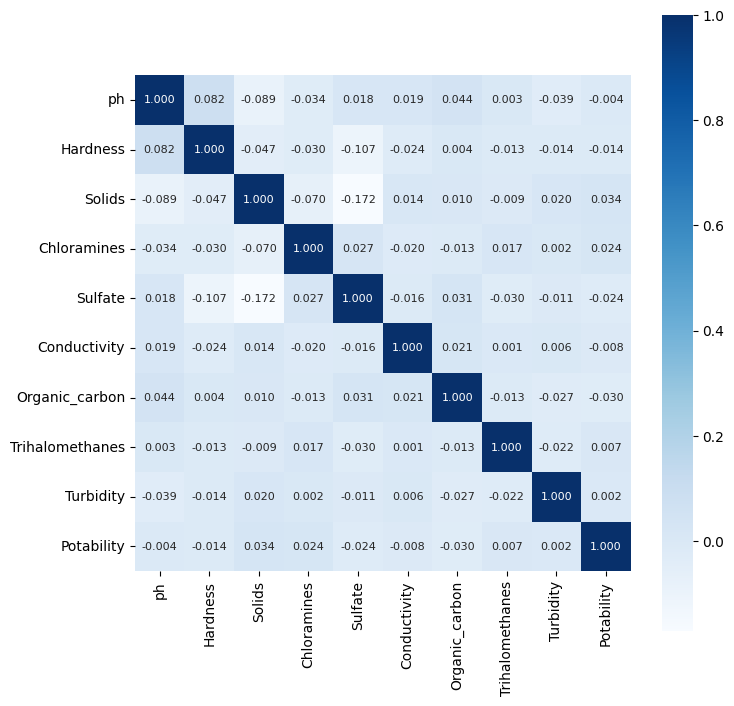

In [18]:
correlation = water_df.corr()
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation , cbar = True, square=True, fmt='.3f', annot=True, annot_kws={'size':8},cmap='Blues')

With the correlation matrix above, we see the impact of the features on each other. The number of variables that have a correlation relationship with each other is quite small. This shows us that each variable independently affects the drinkability of water.

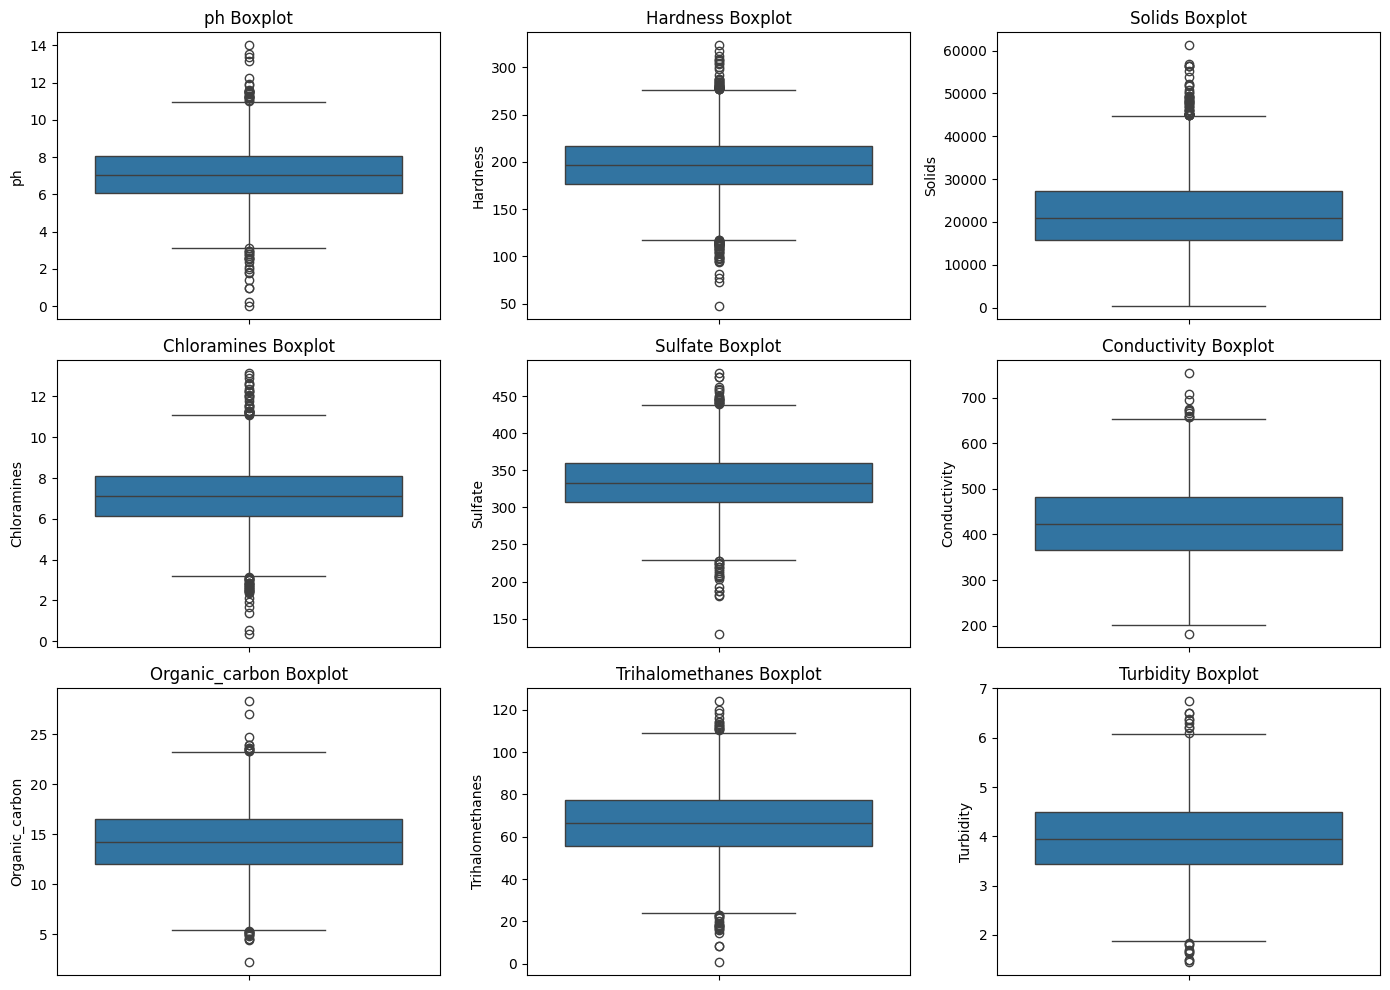

In [19]:
#Katılar (Solids) ve İçilebilirlik(Potability) İlişkisi
#ph	Hardness	Solids	Chloramines	Sulfate	Conductivity	Organic_carbon	Trihalomethanes	Turbidity	Potability
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))

sns.boxplot(water_df["ph"],ax = axes[0][0])
axes[0][0].set_title('ph Boxplot')

sns.boxplot(water_df["Hardness"],ax = axes[0][1])
axes[0][1].set_title('Hardness Boxplot')

sns.boxplot(water_df["Solids"],ax = axes[0][2])
axes[0][2].set_title('Solids Boxplot')

sns.boxplot(water_df['Chloramines'], ax = axes[1][0])
axes[1][0].set_title('Chloramines Boxplot')

sns.boxplot(water_df['Sulfate'], ax = axes[1][1])
axes[1][1].set_title('Sulfate Boxplot')

sns.boxplot(water_df['Conductivity'], ax = axes[1][2])
axes[1][2].set_title('Conductivity Boxplot')

sns.boxplot(water_df['Organic_carbon'], ax = axes[2][0])
axes[2][0].set_title('Organic_carbon Boxplot')

sns.boxplot(water_df['Trihalomethanes'], ax = axes[2][1])
axes[2][1].set_title('Trihalomethanes Boxplot')

sns.boxplot(water_df['Turbidity'], ax = axes[2][2])
axes[2][2].set_title('Turbidity Boxplot')

plt.tight_layout(w_pad=1.0,h_pad=1.0)
plt.show()

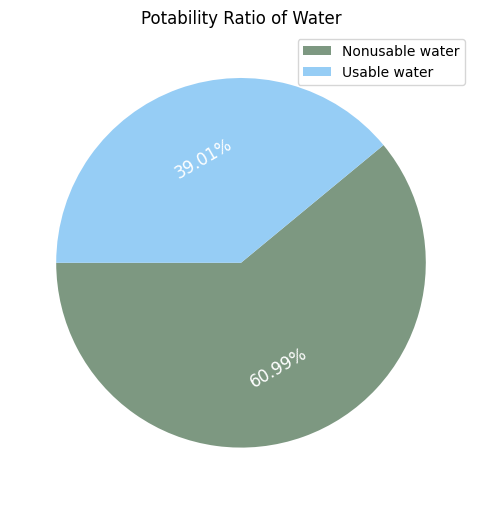

In [20]:
#How much of the water in the data set is suitable for human consumption?
nonusable_water, usable_water = water_df['Potability'].value_counts()
labels = ['Nonusable water', 'Usable water']
sizes =  nonusable_water, usable_water

plt.figure(figsize=(8,6))
plt.pie(sizes,
        labels=labels,
        autopct='%.2f%%',
        textprops = {
           'size' : "large",
           'rotation' : 30,
           'color' : "white"
       },
        startangle=180,
        colors=['#7D9881','#96CDF5'])
plt.legend()
plt.title('Potability Ratio of Water')
plt.show()

In [21]:
water_df.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.085378,196.733292,21777.490788,7.092175,334.56429,426.730454,14.364335,66.303555,3.965800
1,7.073783,195.800744,22383.991018,7.169338,332.56699,425.383800,14.160893,66.539684,3.968328


##Fillling missing values and preparing data

We will fill the missing values with mean values. As we see in above the distribution of each category has normal distribution , also when we print the mean and median values we can say that most of the values has similar values with it's mean and median. That means the distrubition centered in these values. So we can use mean value for missing values.

In [22]:
df_water_stats = water_df.copy()

In [23]:
# filling the null pH values with it's mean
df_water_stats.loc[:,"ph"] = df_water_stats["ph"].fillna(np.mean(df_water_stats["ph"]))

# filling the null Sulfate values with it's mean
df_water_stats.loc[:,"Sulfate"] = df_water_stats["Sulfate"].fillna(np.mean(df_water_stats["Sulfate"]))

#filling the null Trihalomethanes  values with it's mean
df_water_stats.loc[:,"Trihalomethanes"] = df_water_stats["Trihalomethanes"].fillna(np.mean(df_water_stats["Trihalomethanes"]))

In [24]:
df_water_stats.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [25]:
df_water_stats.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [26]:
df_water_stats['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

0 -> Non Potability

1 -> Potability  

In [27]:
df_no_outliers = df_water_stats.copy()

for feature in df_water_stats.columns[:-1]:
  q1 = df_water_stats[feature].quantile(0.25)
  q3 = df_water_stats[feature].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  df_no_outliers = df_no_outliers[(df_no_outliers[feature] >= lower_bound) & (df_no_outliers[feature] <= upper_bound)]


In [28]:
df_no_outliers

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


**Separating Data and Labels**

In [29]:
X = df_no_outliers.drop(columns='Potability',axis=1)
Y = df_no_outliers['Potability']

In [30]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [31]:
Y

0       0
2       0
3       0
4       0
5       0
       ..
3270    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 2666, dtype: int64

##Data Standardization/Normalization

Water Potability dataset has different range in every feature. The features with larger scales might dominate the smaller scales during training. Standardization ensures that all features have a similar scale, preventing bias in the model towards certain features.

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(X)

StandardScaler()

In [34]:
standardized_data = scaler.transform(X)

In [35]:
X = standardized_data

In [36]:
print(X)
print(Y)

[[ 5.96658851e-03  2.76379921e-01 -8.77880371e-02 ... -1.22048774e+00
   1.37976224e+00 -1.31241359e+00]
 [ 8.43881856e-01  9.58501474e-01 -1.99086920e-01 ...  7.96898176e-01
  -1.22553709e-03 -1.19044488e+00]
 [ 1.02296462e+00  6.10742703e-01  6.70976648e-02 ...  1.28435472e+00
   2.27603701e+00  8.76799035e-01]
 ...
 [ 1.93033913e+00 -7.50649326e-01  1.47284221e+00 ... -1.01551540e+00
   2.28726154e-01 -8.71136576e-01]
 [-1.60187508e+00  1.18301567e+00 -1.19947390e+00 ... -9.75136766e-01
   7.41812231e-01  9.81799020e-01]
 [ 6.59194660e-01 -6.87446756e-02 -5.15316773e-01 ...  5.70479109e-01
   8.23058996e-01 -2.17197465e+00]]
0       0
2       0
3       0
4       0
5       0
       ..
3270    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 2666, dtype: int64


### Train Test Split

In [37]:
X_train , X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [38]:
X_train

array([[ 1.08184376,  2.08672305, -0.5921042 , ..., -1.08321348,
        -0.75512227, -0.14049963],
       [-1.74615835, -1.54576644, -0.17285599, ..., -0.76908934,
         0.13086031, -0.11958877],
       [ 0.00596659, -1.4202066 ,  0.20160506, ...,  1.5363756 ,
         1.01593976,  2.10719442],
       ...,
       [ 0.35077453,  0.49127113,  0.28029112, ...,  1.1741195 ,
        -0.90434249,  0.64771746],
       [ 0.54534871,  0.98765548, -0.2511775 , ...,  0.26376031,
         0.55900112, -0.34271736],
       [ 0.00596659,  2.10221822, -1.58811741, ...,  0.79062011,
         0.41953773, -0.77544651]])

In [39]:
y_train

2271    0
2748    1
3106    0
1173    1
1981    1
       ..
2003    1
1338    0
1378    0
1583    1
1043    0
Name: Potability, Length: 2132, dtype: int64

## Creating a Water Potability Prediction Model

### **Logistic Regression**

Logistic Regression is a statistical method used for binary classification tasks, where the outcome variable is categorical and has only two possible classes. In our case it is water potability. It has 2 option either it's okay to compsumtion or not.

In [40]:
logistic_reg_model = LogisticRegression()

In [41]:
logistic_reg_model

LogisticRegression()

In [42]:
logistic_reg_model.fit(X_train,y_train)

LogisticRegression()

Accuracy score on training data

In [43]:
X_train_pred_for_logistic_reg = logistic_reg_model.predict(X_train)

In [44]:
training_data_accuracy_for_logistic_reg = accuracy_score(X_train_pred_for_logistic_reg , y_train)

In [45]:
print("Accuracy score for train set: ", training_data_accuracy_for_logistic_reg)

Accuracy score for train set:  0.623358348968105


Accuracy score on test data

In [46]:
X_test

array([[ 0.79339029,  0.07623044,  2.38325502, ..., -0.01578086,
         0.15608931, -0.51147569],
       [-1.35290892, -0.47997217, -0.78527458, ...,  1.01854531,
        -1.08563675, -1.15653203],
       [-0.47798729, -0.85285527, -0.86603667, ..., -1.27263343,
        -0.63700117,  0.92805784],
       ...,
       [-1.44306325,  0.25210793,  0.11409964, ..., -0.10301866,
         1.12244267, -1.36157433],
       [ 0.37728156, -0.40708462,  0.37461116, ...,  0.23777875,
         0.56004453, -0.20122428],
       [ 0.28761704,  0.4581683 ,  1.20998088, ...,  0.77742134,
        -1.66694561, -0.32725376]])

In [47]:
X_test_pred_for_logistic_reg = logistic_reg_model.predict(X_test)

In [48]:
test_data_accuracy_for_logistic_reg = accuracy_score(X_test_pred_for_logistic_reg, y_test)

In [49]:
print('Accuracy score for test set: ', test_data_accuracy_for_logistic_reg)

Accuracy score for test set:  0.6404494382022472


### **KNN classification**

K-Nearest Neighbors (KNN) is an algorithm that makes predictions based on the majority class or average value of the "K" nearest data points. It classifies a new data point by looking at the classes of its closest neighbors in a feature space.

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=3) # we decleared neigbors as 3

In [51]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
X_train_pred_for_knn = knn_model.predict(X_train)

In [53]:
training_data_accuracy_for_knn = accuracy_score(X_train_pred_for_knn , y_train)

Accuracy score on training data

In [54]:
print('Accuracy score for training data on knn model : ',training_data_accuracy_for_knn)

Accuracy score for training data on knn model :  0.7870544090056285


Accuracy score on test data

In [55]:
X_test_pred_for_knn = knn_model.predict(X_test)

In [56]:
test_data_accuracy_for_knn = accuracy_score(X_test_pred_for_knn,y_test)

In [57]:
print('Accuracy score for test data on knn model : ', test_data_accuracy_for_knn)

Accuracy score for test data on knn model :  0.6329588014981273


Confusion Matrix

In [58]:
print(confusion_matrix(y_test, X_test_pred_for_knn))

[[264  78]
 [118  74]]


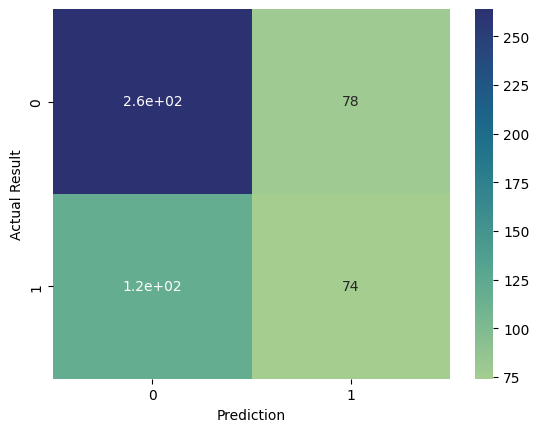

In [59]:
sns.heatmap(confusion_matrix(y_test, X_test_pred_for_knn), annot=True,cmap ="crest" )
plt.xlabel("Prediction")
plt.ylabel("Actual Result")

plt.show()

In [60]:
print(classification_report(y_test, X_test_pred_for_knn))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       342
           1       0.49      0.39      0.43       192

    accuracy                           0.63       534
   macro avg       0.59      0.58      0.58       534
weighted avg       0.62      0.63      0.62       534



###Creating Sentetic Data

In [61]:
sentetic_data = np.array([
    [8.09, 224.23, 19909.54, 9.27, 333.77, 418.60, 16.8, 66.42, 3.05, 0],
    [8.31, 214.37, 22018.41, 8.05, 356.88, 363.26, 18.44, 100.34, 4.62, 0],
    [9.09, 181.10, 17978.98, 6.54, 310.13, 398.41, 11.59, 31.997, 4.07, 0],
    [5.58, 188.31, 28748.68, 7.54, 326.67, 280.46, 8.3, 54.91, 2.5, 0],
    [10.22, 248.07, 28749.71, 7.51, 393.66, 283.65, 13.75, 84.60, 2.67, 0],
    [6.70, 207.32, 17246.92, 7.70, 304.51, 329.26, 16.23, 28.87, 3.44, 1],
    [6.06, 186.65, 26138.78, 7.74, 345.70, 415.88, 12.06, 60.41, 3.62, 1],
    [4.66, 193.68, 47580.99, 7.16, 359.94, 526.42, 13.89, 66.68, 4.42, 1],
    [7.80, 193.55, 17329.80, 8.06, 308.77, 392.44, 19.90, 66.39, 2.7, 1],
    [9.41, 175.76, 33155.57, 7.35, 333.77, 432.04, 11.039, 69.84, 3.2, 1]
])
print(sentetic_data.shape)

(10, 10)


In [62]:
# Standardizing sentetic data
std_sentetic_data = scaler.transform(sentetic_data[:, :9])
sentetic_data_X = sentetic_data[:,:9]
sentetic_data_Y =sentetic_data[:,9]

print(sentetic_data_X)
print(sentetic_data_Y)


[[8.090000e+00 2.242300e+02 1.990954e+04 9.270000e+00 3.337700e+02
  4.186000e+02 1.680000e+01 6.642000e+01 3.050000e+00]
 [8.310000e+00 2.143700e+02 2.201841e+04 8.050000e+00 3.568800e+02
  3.632600e+02 1.844000e+01 1.003400e+02 4.620000e+00]
 [9.090000e+00 1.811000e+02 1.797898e+04 6.540000e+00 3.101300e+02
  3.984100e+02 1.159000e+01 3.199700e+01 4.070000e+00]
 [5.580000e+00 1.883100e+02 2.874868e+04 7.540000e+00 3.266700e+02
  2.804600e+02 8.300000e+00 5.491000e+01 2.500000e+00]
 [1.022000e+01 2.480700e+02 2.874971e+04 7.510000e+00 3.936600e+02
  2.836500e+02 1.375000e+01 8.460000e+01 2.670000e+00]
 [6.700000e+00 2.073200e+02 1.724692e+04 7.700000e+00 3.045100e+02
  3.292600e+02 1.623000e+01 2.887000e+01 3.440000e+00]
 [6.060000e+00 1.866500e+02 2.613878e+04 7.740000e+00 3.457000e+02
  4.158800e+02 1.206000e+01 6.041000e+01 3.620000e+00]
 [4.660000e+00 1.936800e+02 4.758099e+04 7.160000e+00 3.599400e+02
  5.264200e+02 1.389000e+01 6.668000e+01 4.420000e+00]
 [7.800000e+00 1.935500e

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [63]:
prediction_of_sentetic_data  = knn_model.predict(std_sentetic_data)
print(sentetic_data_Y)
print(prediction_of_sentetic_data)

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[0 0 0 1 0 1 1 0 1 0]


In [64]:
pd.DataFrame(data={" Tahmin Değeri   ": prediction_of_sentetic_data, "Gerçek Değeri  ": sentetic_data_Y, "Tahmin Doğruluğu   ": prediction_of_sentetic_data==sentetic_data_Y})

,Tahmin Değeri,Gerçek Değeri,Tahmin Doğruluğu
0,0,0.0,True
1,0,0.0,True
2,0,0.0,True
3,1,0.0,False
4,0,0.0,True
5,1,1.0,True
6,1,1.0,True
7,0,1.0,False
8,1,1.0,True
9,0,1.0,False


### FINAL EVALUATION ABOUT DATASET AND MODEL

The water potability dataset has 9 different features, and all of these features are independent of each other. Additionally, for every feature and its corresponding range, there is water data indicating whether it is okay for consumption. This complexity makes it challenging for us to draw conclusions. We can also observe this from the mean values for each class (1 and 0, representing okay and not okay for consumption). The mean values for each feature in these classes are very close to each other, with only slight differences. This similarity adds to the difficulty of making definitive conclusions.

As for models, Logistic regression gives us slightly a better result in accuracy with : 0.6404